# Validation of Two Earth-mass planets orbiting GJ 1002

*Paula Andrea Castro Nieva* 

This Jupyter Notebook serves to accompany the Research Note of the AAS with the purpose of documenting the experiments shown in the publication.  


## Imports 

First we have to install the NWelch package by pip installing:

In [1]:
pip install -i https://test.pypi.org/simple/NWelch

Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")


The following code block imports all the other necessary packages. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.timeseries import LombScargle

from NWelch import TimeSeries
from NWelch import Bivariate as Bi

## Read the Data 

Data are from <a href="https://ui.adsabs.harvard.edu/abs/2023A%26A...670A...5S/abstract">	
Mascareño et al. (2023)</a>

In [3]:
data = pd.read_csv('GJ1002_SuarezMascareno_2023.txt', delim_whitespace=True,
                  header=None, comment='#', skiprows=50,
                  names=['BJD-2450000', 'RV1', 'RV2', 'RV3', 'RV4', 'e_RV', 'FWHM1', 'FWHM2',
                         'FWHM3', ' e_FWHM', 'Temp', 'Inst'])
data  

C:\Users\paula\AppData\Local\Temp\ipykernel_34308\2079146661.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('GJ1002_SuarezMascareno_2023.txt', delim_whitespace=True,


BJD-2450000   RV1   RV2   RV3   RV4  e_RV  FWHM1  FWHM2  FWHM3   e_FWHM  \
0       7595.622 -1.27 -1.64 -2.10 -1.25  1.50  -0.78   2.86   3.83    12.09   
1       7596.621  0.69  0.31 -0.33 -0.34  1.49  -5.51  -1.87  -0.82    11.93   
2       7606.655  7.91  7.54  5.67  3.70  1.75  11.11  14.74  12.73    12.22   
3       7610.647  2.51  2.13  0.37  0.49  1.44   5.72   9.35   8.65    12.26   
4       7613.597 -1.40 -1.78 -3.26 -0.87  1.70   0.39   4.03   4.15    12.36   
..           ...   ...   ...   ...   ...   ...    ...    ...    ...      ...   
134     9555.545  0.97  0.47  1.87  0.34  0.29  -0.28  -0.46   0.22     1.38   
135     9556.558 -0.46 -0.96  0.64 -0.04  0.29  -0.20  -0.38   0.34     1.38   
136     9557.561 -1.33 -1.83 -0.04  0.04  0.25  -0.78  -0.96  -0.20     1.16   
137     9563.590 -2.09 -2.59  0.30 -0.06  0.23  -2.04  -2.21  -1.71     1.03   
138     9564.571 -2.95 -3.45 -0.42 -0.34  0.25  -1.10  -1.28  -0.72     1.16   

     Temp  Inst  
0       9     0  
1       9     0  
2     -12     0  
3      -4     0  
4       0     0  
..    ...   ...  
134     9     3  
135    10     3  
136    11     3  
137     6     3  
138     7     3  

[139 rows x 12 columns]

In [4]:
file = 'GJ1002_SuarezMascareno_2023.txt'
time, rvobs, rverr, fwhm,fwhmerr, number = np.loadtxt(file, usecols=[0, 2, 5, 8,9,11], unpack=True, 
                                      skiprows=50, comments='#')


In [5]:
colormap = {0: 'blue',  # CARMENES
            1: 'red',   # ESPRESSO 18
            2: 'green', # ESPRESSO 19
            3: 'orange'} # ESPRESSO 21

colors = [colormap[int(n)] for n in number]

C:\Users\paula\AppData\Local\Temp\ipykernel_34308\3350011229.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(time - time[0], rvobs, c=colors, label='Data with error', cmap='Set1')


Nyquist frequency from mean dt: 0.03504
Nyquist frequency from 10% trimmed mean dt: 0.09190
Nyquist frequency from 20% trimmed mean dt: 0.11892
Nyquist frequency from median dt: 0.16714
Rayleigh resolution: 0.00051
Number of observations: 139


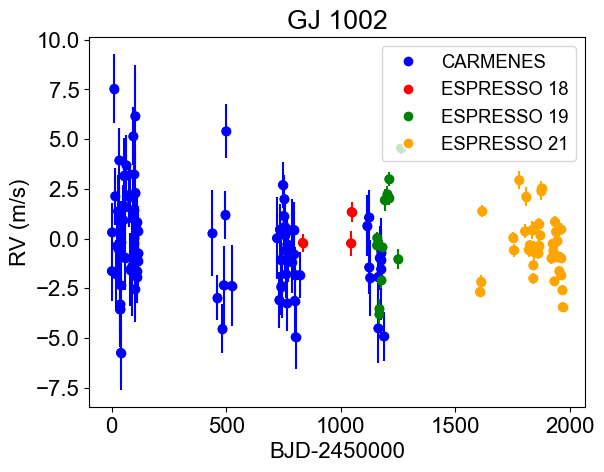

In [6]:
rv = TimeSeries.TimeSeries(time,rvobs)
scatter = plt.scatter(time - time[0], rvobs, c=colors, label='Data with error', cmap='Set1')
for i in range(len(time)):
    plt.errorbar(time[i] - time[0], rvobs[i], yerr=rverr[i], fmt='o', color=colors[i])
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=col, markersize=8, label=label) 
           for label, col in zip(['CARMENES', 'ESPRESSO 18', 'ESPRESSO 19', 'ESPRESSO 21'], 
                                 ['blue', 'red', 'green', 'orange'])]
plt.legend(handles=handles,fontsize='small')
plt.xlabel('BJD-2450000')
plt.ylabel('RV (m/s)')
plt.title('GJ 1002')
print('Number of observations:', rv.N)

Nyquist frequency from mean dt: 0.03504
Nyquist frequency from 10% trimmed mean dt: 0.09190
Nyquist frequency from 20% trimmed mean dt: 0.11892
Nyquist frequency from median dt: 0.16714
Rayleigh resolution: 0.00051
Number of observations: 139


C:\Users\paula\AppData\Local\Temp\ipykernel_34308\3047469948.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(time - time[0], fwhm, c=colors, label='Datos con error', cmap='Set1')


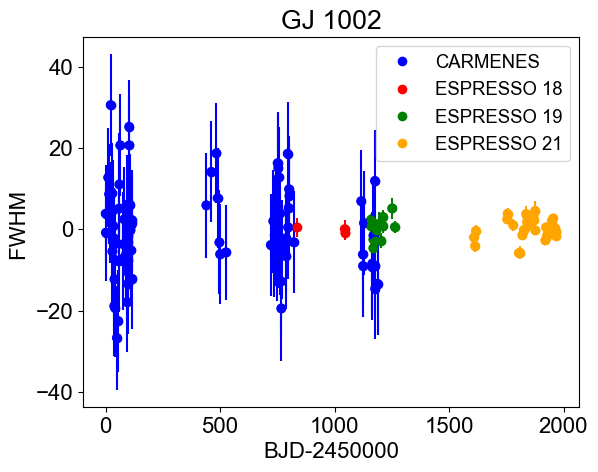

In [7]:
FWHM = TimeSeries.TimeSeries(time,fwhm)
scatter = plt.scatter(time - time[0], fwhm, c=colors, label='Datos con error', cmap='Set1')
for i in range(len(time)):
    plt.errorbar(time[i] - time[0], fwhm[i], yerr=fwhmerr[i], fmt='o', color=colors[i])
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=col, markersize=8, label=label) 
           for label, col in zip(['CARMENES', 'ESPRESSO 18', 'ESPRESSO 19', 'ESPRESSO 21'], 
                                 ['blue', 'red', 'green', 'orange'])]
plt.legend(handles=handles,fontsize='small')
plt.xlabel('BJD-2450000')
plt.ylabel('FWHM ')
plt.title('GJ 1002')
print('Number of observations:', FWHM.N)

## NWelch Analysis



Number of data points per segment: 92
frequency associated with the median timestep. Make sure that makes
sense for your dataset.
Number of segments: 2
Segment start and end points: [[  0  92]
 [ 46 139]]
Effective number of segments: 1.600000
Frequency grid spacing: 0.000112
Minimum 6-dB main lobe half width: 0.000815
Mean 6-dB main lobe half width (1/2 resolution limit): 0.000920
Best achievable Rayleigh limit (1/2 best-case resolution limit): 0.000673
Iteration 0
Iteration 500
Iteration 1000
Iteration 1500
Iteration 2000
Iteration 2500
Iteration 3000
Iteration 3500
Iteration 4000
Iteration 4500
Iteration 5000
Iteration 5500
Iteration 6000
Iteration 6500
Iteration 7000
Iteration 7500
Iteration 8000
Iteration 8500
Iteration 9000
Iteration 9500
Number of data points per segment: 92
frequency associated with the median timestep. Make sure that makes
sense for your dataset.
Number of segments: 2
Segment start and end points: [[  0  92]
 [ 46 139]]
Effective number of segments: 1.600000
F

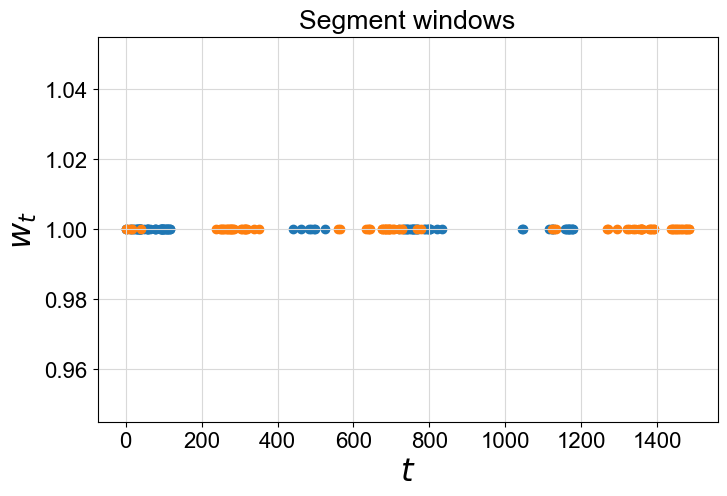

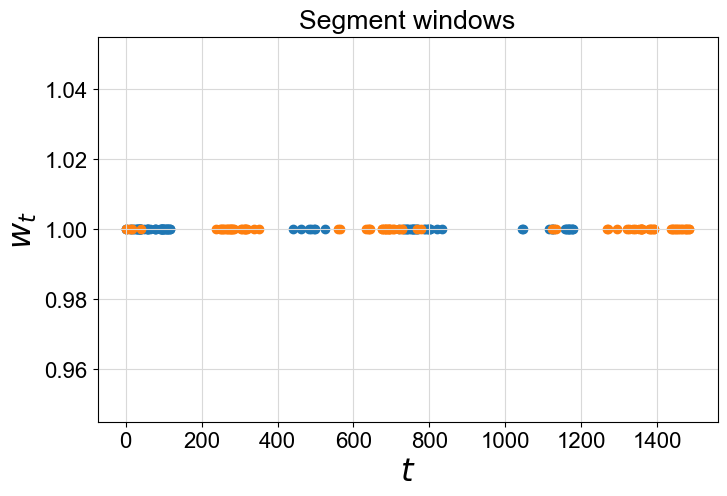

In [8]:
nyquistm = 0.03504
rv.segment_data(2, 5*nyquistm, window = 'None', plot_windows = True)
rv.Welch_powspec()
rv.Welch_powspec_bootstrap()


FWHM.segment_data(2, 5*nyquistm, window = 'None', plot_windows = True)
FWHM.Welch_powspec()
FWHM.Welch_powspec_bootstrap()

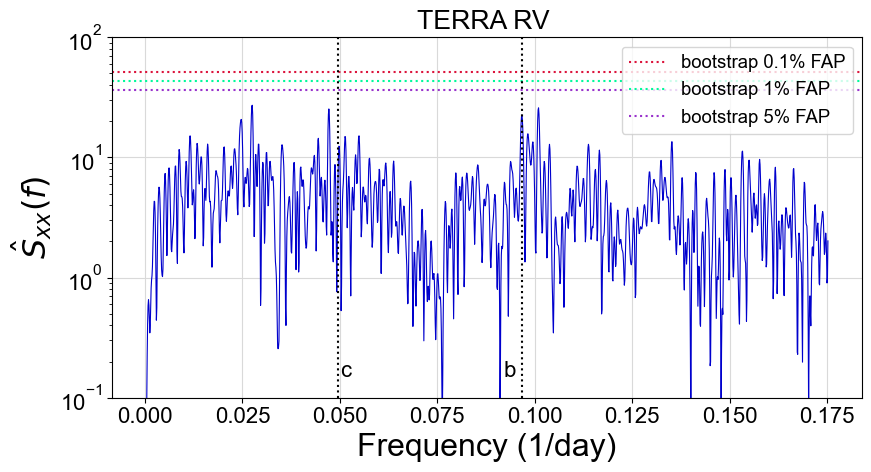

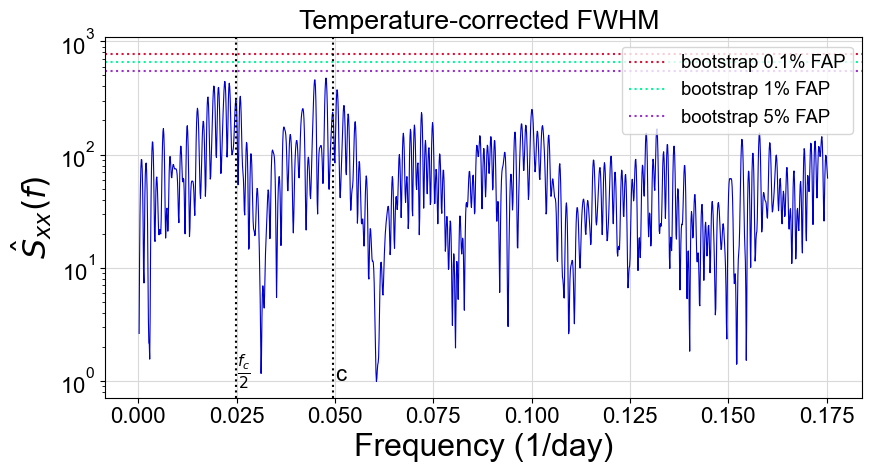

In [9]:
pb = 10.3465 # Period planet b report in the papper
pc =  20.202 # Period planet c report in the papper
prot = 126 # Period rotation report in the papper
planets = [1/pb, 1/pc]

rv.powplot(Welch = True,title='TERRA RV ', vlines=planets )
plt.xlabel('Frequency (1/day)')
plt.ylabel(r"$\hat{S}_{xx}(f)$")
plt.ylim(10**-1,10**2)
plt.text(0.092,0.15,r"b")
plt.text(0.050,0.15,r"c")
plt.tight_layout()
plt.savefig('TERRARVNWelch.pdf',format='pdf')


FWHM.powplot(Welch = True,title='Temperature-corrected FWHM ', vlines=[1/pc, 0.5*1/pc])
plt.xlabel('Frequency (1/day)')
plt.ylabel(r"$\hat{S}_{xx}(f)$")
plt.text(0.025,1,r"$\frac{f_c}{2}$")
plt.text(0.050,1,r"c")
plt.tight_layout()
plt.savefig('FWHMNWelch.pdf',format='pdf')

## Pseudowindow
Create four versions of a fake signal moving the phase with the same period as each planet.
Calculate and plot the Welch's power spectrum and spectral window

planet b

In [10]:
t = time
RV1F=np.zeros((4,len(t)))

phase=[0,np.pi/2,np.pi,3*np.pi/4]

for j in range(len(phase)):
    RV1F[j,:]=np.sin(2 * np.pi * 1/pb * t + phase[j])

In [11]:
RV1FT =[]

for k in range(4):
    RV1FT.append(TimeSeries.TimeSeries(t,RV1F[k,:]))

Nyquist frequency from mean dt: 0.03504
Nyquist frequency from 10% trimmed mean dt: 0.09190
Nyquist frequency from 20% trimmed mean dt: 0.11892
Nyquist frequency from median dt: 0.16714
Rayleigh resolution: 0.00051
Nyquist frequency from mean dt: 0.03504
Nyquist frequency from 10% trimmed mean dt: 0.09190
Nyquist frequency from 20% trimmed mean dt: 0.11892
Nyquist frequency from median dt: 0.16714
Rayleigh resolution: 0.00051
Nyquist frequency from mean dt: 0.03504
Nyquist frequency from 10% trimmed mean dt: 0.09190
Nyquist frequency from 20% trimmed mean dt: 0.11892
Nyquist frequency from median dt: 0.16714
Rayleigh resolution: 0.00051
Nyquist frequency from mean dt: 0.03504
Nyquist frequency from 10% trimmed mean dt: 0.09190
Nyquist frequency from 20% trimmed mean dt: 0.11892
Nyquist frequency from median dt: 0.16714
Rayleigh resolution: 0.00051


Number of data points per segment: 92
frequency associated with the median timestep. Make sure that makes
sense for your dataset.
Number of segments: 2
Segment start and end points: [[  0  92]
 [ 46 139]]
Effective number of segments: 1.600000
Frequency grid spacing: 0.000112
Minimum 6-dB main lobe half width: 0.000815
Mean 6-dB main lobe half width (1/2 resolution limit): 0.000920
Best achievable Rayleigh limit (1/2 best-case resolution limit): 0.000673
Iteration 0
Iteration 500
Iteration 1000
Iteration 1500
Iteration 2000
Iteration 2500
Iteration 3000
Iteration 3500
Iteration 4000
Iteration 4500
Iteration 5000
Iteration 5500
Iteration 6000
Iteration 6500
Iteration 7000
Iteration 7500
Iteration 8000
Iteration 8500
Iteration 9000
Iteration 9500
Number of data points per segment: 92
frequency associated with the median timestep. Make sure that makes
sense for your dataset.
Number of segments: 2
Segment start and end points: [[  0  92]
 [ 46 139]]
Effective number of segments: 1.600000
F

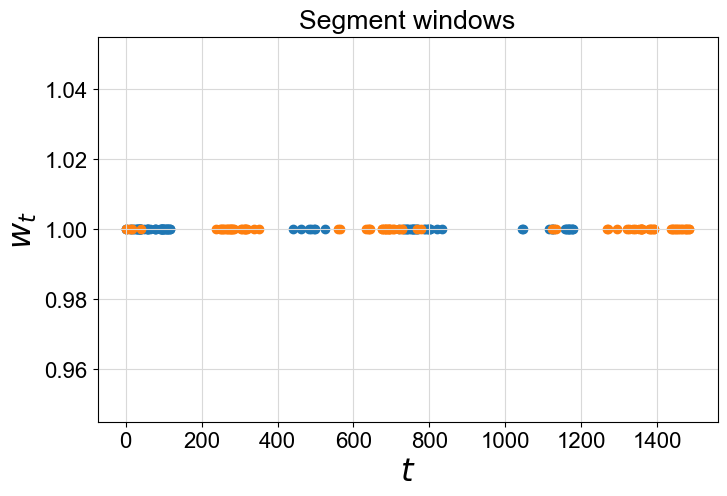

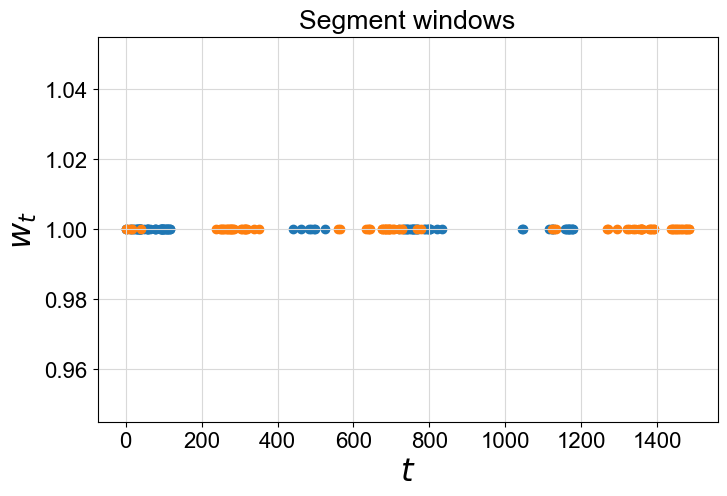

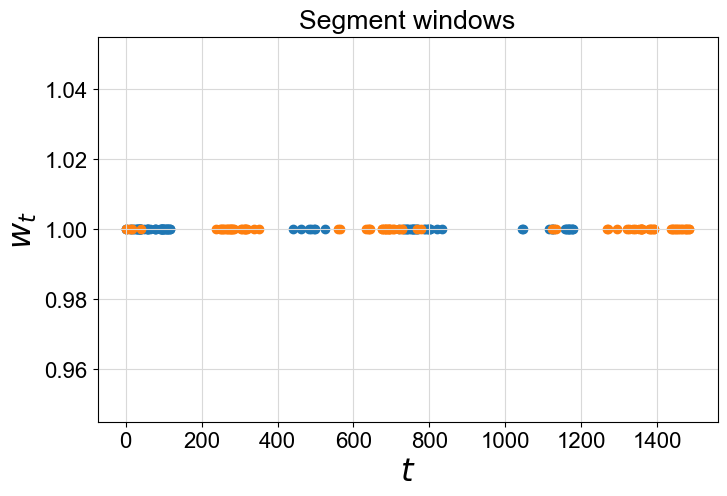

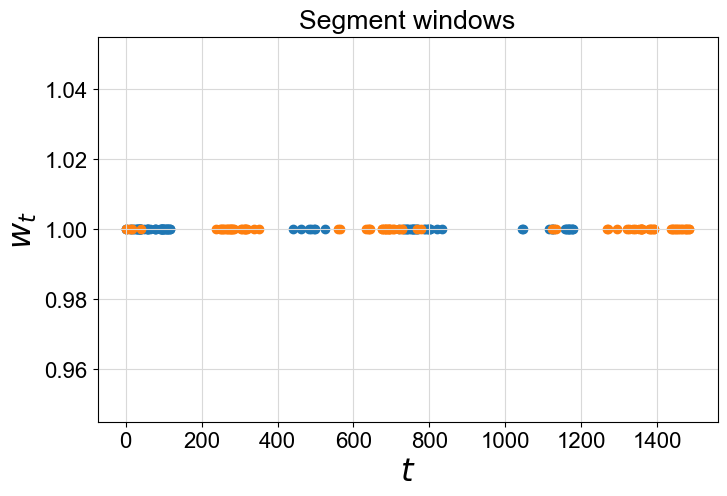

In [12]:
nyquistm = 0.03504
for u in range(4):
    RV1FT[u].segment_data(2, 5*nyquistm, window = 'None', plot_windows = True)
    RV1FT[u].Welch_powspec()
    RV1FT[u].Welch_powspec_bootstrap()

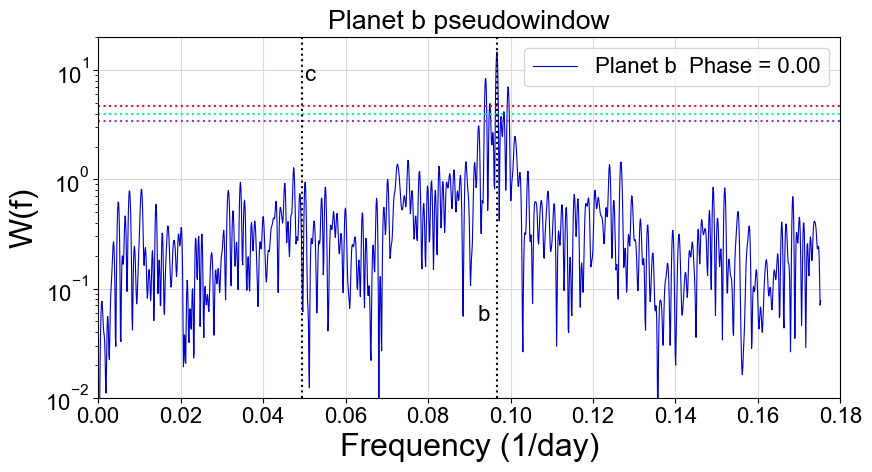

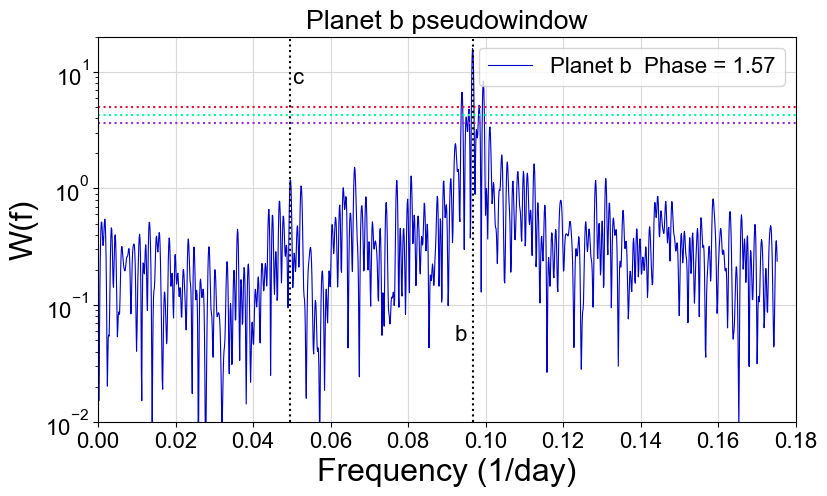

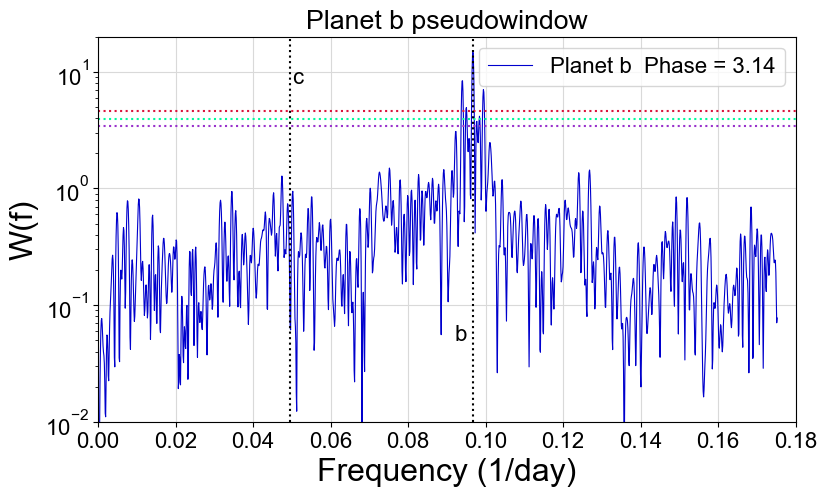

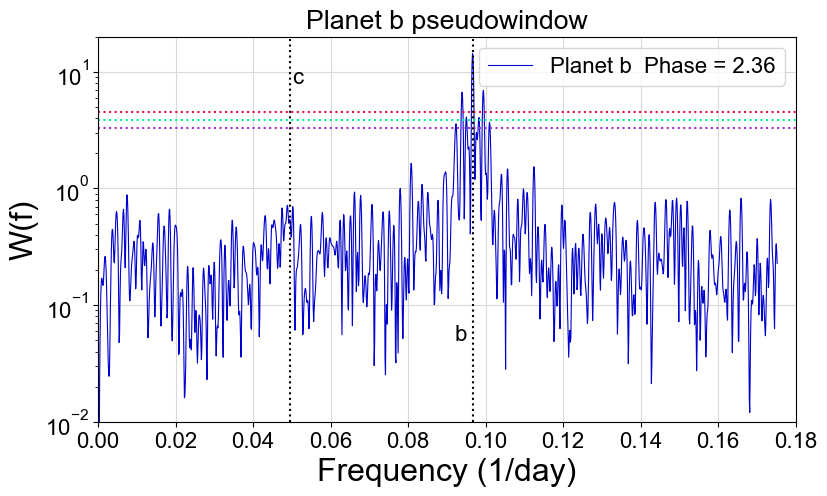

In [13]:
for w in range(4):
    RV1FT[w].powplot(title= 'Planet b pseudowindow', Welch = True, vlines=planets)
    plt.legend(['Planet b ' f' Phase = {phase[w]:.2f}'], loc='upper right')
    plt.xlabel('Frequency (1/day)')
    plt.ylabel('W(f)')
    plt.ylim(10**-2,20)
    plt.xlim(0,0.180)
    plt.text(0.092,0.05,r"b")
    plt.text(0.050,8,r"c")
    if w==0: 
        plt.tight_layout()
        plt.savefig('pseudowindowb.pdf',format='pdf')


planet c

In [14]:
RV2F=np.zeros((4,len(t)))

phase=[0,np.pi/2,np.pi,3*np.pi/4]

for j in range(len(phase)):
    RV2F[j,:]=np.sin(2 * np.pi * 1/pc * t + phase[j])

In [15]:
RV2FT =[]

for k in range(4):
    RV2FT.append(TimeSeries.TimeSeries(t,RV2F[k,:]))

Nyquist frequency from mean dt: 0.03504
Nyquist frequency from 10% trimmed mean dt: 0.09190
Nyquist frequency from 20% trimmed mean dt: 0.11892
Nyquist frequency from median dt: 0.16714
Rayleigh resolution: 0.00051
Nyquist frequency from mean dt: 0.03504
Nyquist frequency from 10% trimmed mean dt: 0.09190
Nyquist frequency from 20% trimmed mean dt: 0.11892
Nyquist frequency from median dt: 0.16714
Rayleigh resolution: 0.00051
Nyquist frequency from mean dt: 0.03504
Nyquist frequency from 10% trimmed mean dt: 0.09190
Nyquist frequency from 20% trimmed mean dt: 0.11892
Nyquist frequency from median dt: 0.16714
Rayleigh resolution: 0.00051
Nyquist frequency from mean dt: 0.03504
Nyquist frequency from 10% trimmed mean dt: 0.09190
Nyquist frequency from 20% trimmed mean dt: 0.11892
Nyquist frequency from median dt: 0.16714
Rayleigh resolution: 0.00051


Number of data points per segment: 92
frequency associated with the median timestep. Make sure that makes
sense for your dataset.
Number of segments: 2
Segment start and end points: [[  0  92]
 [ 46 139]]
Effective number of segments: 1.600000
Frequency grid spacing: 0.000112
Minimum 6-dB main lobe half width: 0.000815
Mean 6-dB main lobe half width (1/2 resolution limit): 0.000920
Best achievable Rayleigh limit (1/2 best-case resolution limit): 0.000673
Iteration 0
Iteration 500
Iteration 1000
Iteration 1500
Iteration 2000
Iteration 2500
Iteration 3000
Iteration 3500
Iteration 4000
Iteration 4500
Iteration 5000
Iteration 5500
Iteration 6000
Iteration 6500
Iteration 7000
Iteration 7500
Iteration 8000
Iteration 8500
Iteration 9000
Iteration 9500
Number of data points per segment: 92
frequency associated with the median timestep. Make sure that makes
sense for your dataset.
Number of segments: 2
Segment start and end points: [[  0  92]
 [ 46 139]]
Effective number of segments: 1.600000
F

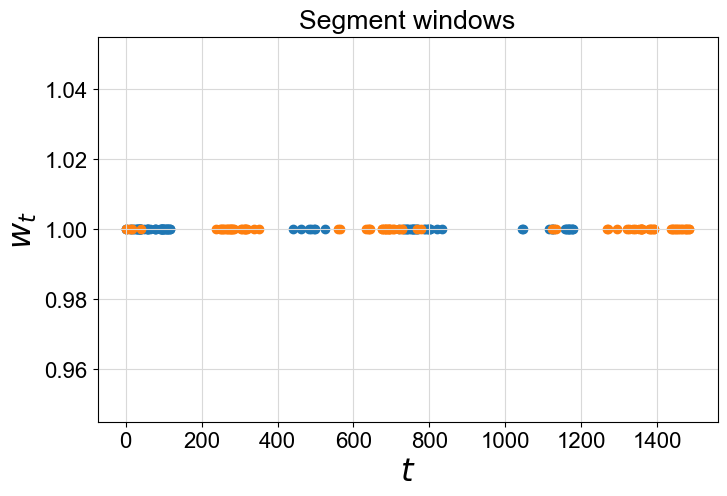

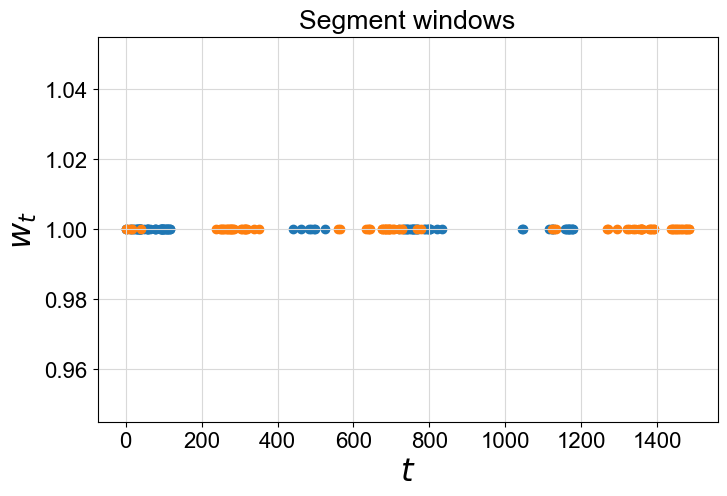

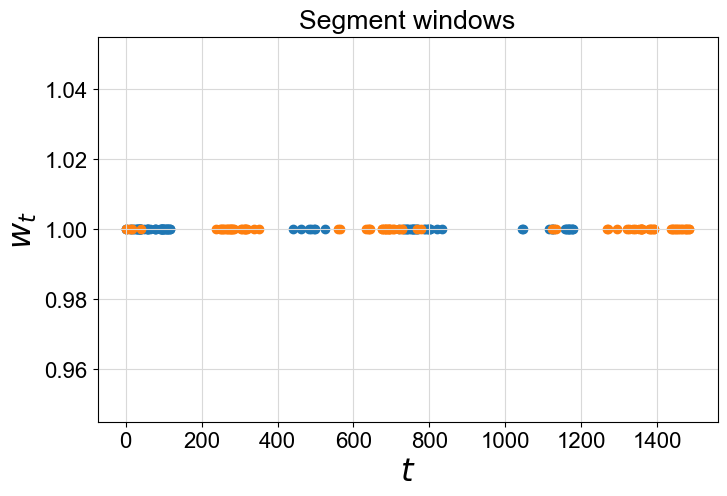

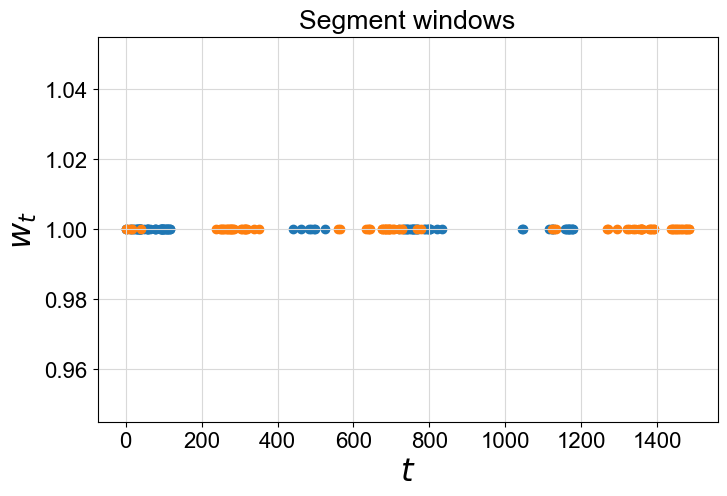

In [16]:
nyquistm = 0.03504
for u in range(4):
    RV2FT[u].segment_data(2, 5*nyquistm, window = 'None', plot_windows = True)
    RV2FT[u].Welch_powspec()
    RV2FT[u].Welch_powspec_bootstrap()

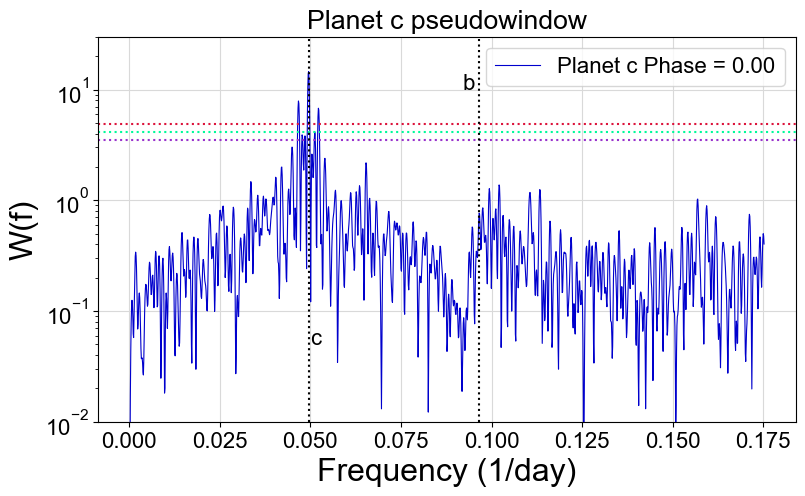

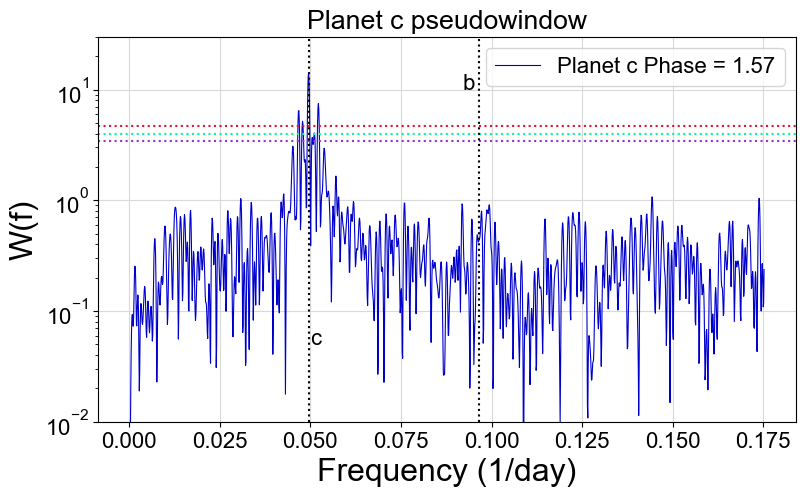

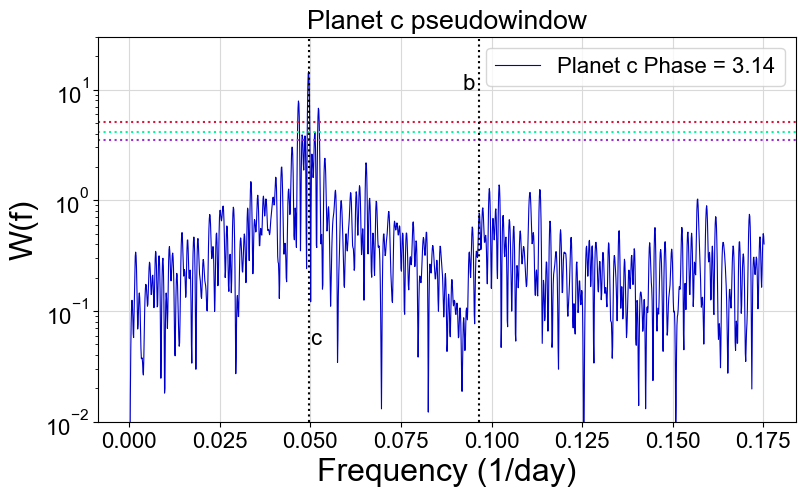

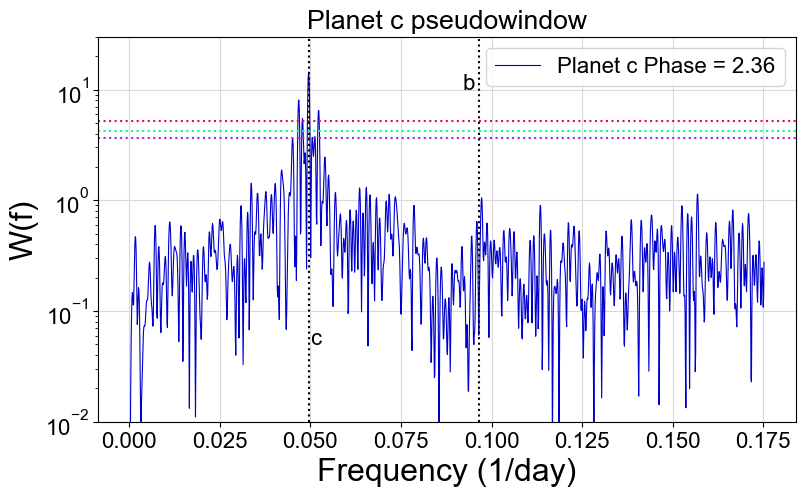

In [17]:
for w in range(4):
    RV2FT[w].powplot(title= 'Planet c pseudowindow', Welch = True, vlines=planets)
    plt.legend(['Planet c' f' Phase = {phase[w]:.2f}'])
    plt.xlabel('Frequency (1/day)')
    plt.ylabel('W(f)')
    plt.ylim(10**-2,30)
    plt.text(0.092,10,r"b")
    plt.text(0.050,0.05,r"c")

## Siegels Tests

In [18]:
rv.Siegel_test(Welch=True)
FWHM.Siegel_test(Welch=True)
rv.Siegel_test(Welch=True,tri=True)
FWHM.Siegel_test(Welch=True,tri=True)

T statistic: 0.00000
T threshold for rejecting white noise hypothesis at 5% level: 0.00505
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
T statistic: 0.00041
T threshold for rejecting white noise hypothesis at 5% level: 0.00505
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
T statistic: 0.01032
T threshold for rejecting white noise hypothesis at 5% level: 0.02199
Null hypothesis not rejected: This time series could be white noise (or red noise; beware)
T statistic: 0.02501
T threshold for rejecting white noise hypothesis at 5% level: 0.02199
Null hypothesis rejected: 95% chance this time series has 1 or more periodicities


## Frequency of highest periodogram peak

In [19]:
N1 = np.random.randn(len(time))
N2=np.random.randn(len(rvobs))
N3=np.random.randn(len(fwhm))

In [20]:
RV2=rvobs+(N2*rverr)
fwhmN=fwhm+(N3*fwhmerr)

plot the time series to make sure it looks similar to the original RVs  

Nyquist frequency from mean dt: 0.03504
Nyquist frequency from 10% trimmed mean dt: 0.09190
Nyquist frequency from 20% trimmed mean dt: 0.11892
Nyquist frequency from median dt: 0.16714
Rayleigh resolution: 0.00051
Number of observations: 139


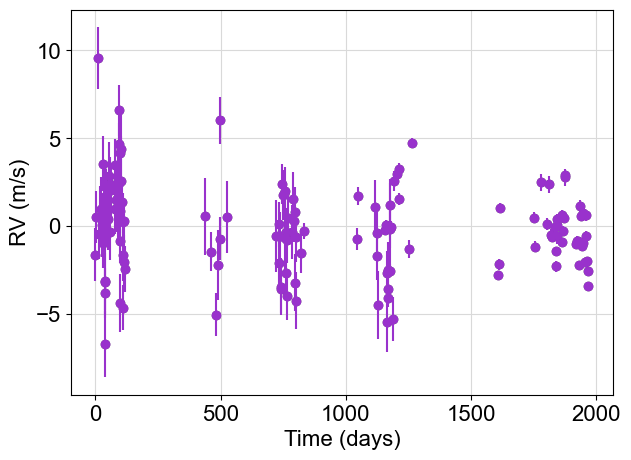

In [21]:
rv_ts2 = TimeSeries.TimeSeries(time,RV2)
rv_ts2.scatterplot( xlabel='Time (days)', ylabel='RV (m/s)' )
plt.errorbar(time-time[0], RV2, yerr=rverr, fmt='o', color='darkorchid', label='Datos wirh error')
print('Number of observations:', rv_ts2.N)


Repeat the same procedure 10000 times and calculated the highest peak in the periodograms

In [22]:
num_iterations = 10000
highest_peak_frequencies = []

for _ in range(num_iterations):
    N2 = np.random.randn(len(rvobs))

    RV2 = rvobs + (N2 * rverr)

    rv_ts=TimeSeries.TimeSeries(time,RV2)
    rv_ts.frequency_grid(0.15982)
    rv_ts.pow_FT(N_bootstrap=10)
    
    
    highest_peak_freq = rv_ts.powfgrid[np.argmax(rv_ts.power)]
    highest_peak_frequencies.append(highest_peak_freq)

Nyquist frequency from mean dt: 0.03504
Nyquist frequency from 10% trimmed mean dt: 0.09190
Nyquist frequency from 20% trimmed mean dt: 0.11892
Nyquist frequency from median dt: 0.16714
Rayleigh resolution: 0.00051
Bootstrap off. To turn on, set integer N_bootstrap >= 100
Nyquist frequency from mean dt: 0.03504
Nyquist frequency from 10% trimmed mean dt: 0.09190
Nyquist frequency from 20% trimmed mean dt: 0.11892
Nyquist frequency from median dt: 0.16714
Rayleigh resolution: 0.00051
Bootstrap off. To turn on, set integer N_bootstrap >= 100
Nyquist frequency from mean dt: 0.03504
Nyquist frequency from 10% trimmed mean dt: 0.09190
Nyquist frequency from 20% trimmed mean dt: 0.11892
Nyquist frequency from median dt: 0.16714
Rayleigh resolution: 0.00051
Bootstrap off. To turn on, set integer N_bootstrap >= 100
Nyquist frequency from mean dt: 0.03504
Nyquist frequency from 10% trimmed mean dt: 0.09190
Nyquist frequency from 20% trimmed mean dt: 0.11892
Nyquist frequency from median dt: 0.1

Plot the distribution of the frequencies 

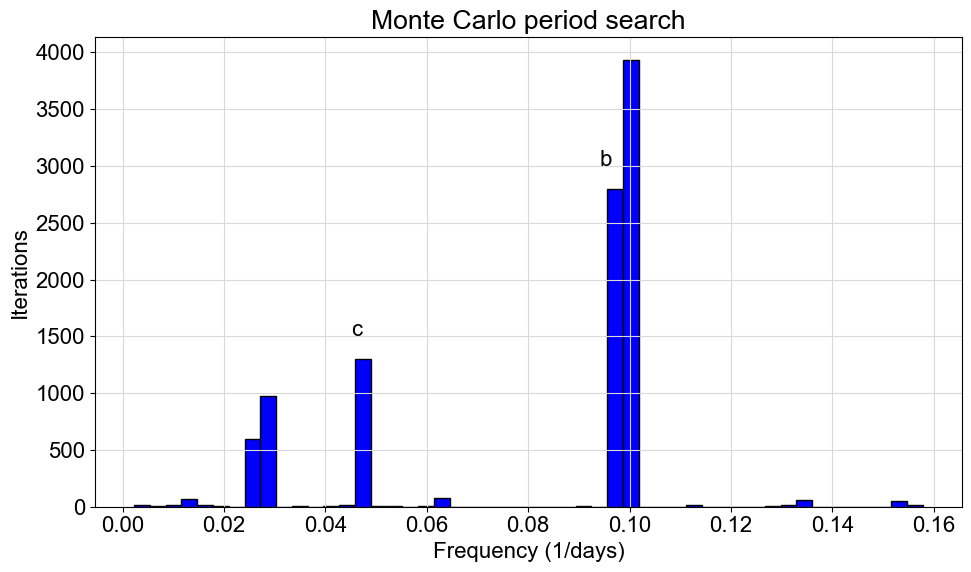

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(highest_peak_frequencies, bins=50, color='blue', edgecolor='black')
plt.xlabel('Frequency (1/days)')
plt.ylabel('Iterations')
plt.title('Monte Carlo period search')
plt.text(0.094,3000,r"b")
plt.text(0.045,1500,r"c")
plt.grid(color='0.85')
plt.tight_layout()
plt.savefig('MontecarloHistrogram.pdf',format='pdf')
plt.show()
